In [1]:
import fastai
fastai.__version__

'2.3.1'

In [2]:
from fastai.vision import *
from fastai.vision.gan import *
from fastai.vision.all import *

In [3]:
path = '../naip_local/lsun/sample/data0/lsun/bedroom'

In [4]:
size=64
bs=128

In [5]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   item_tfms=Resize((size,size), method=ResizeMethod.Pad), 
                   batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])))

In [6]:
dls = dblock.dataloaders(path, path=path, bs=bs)

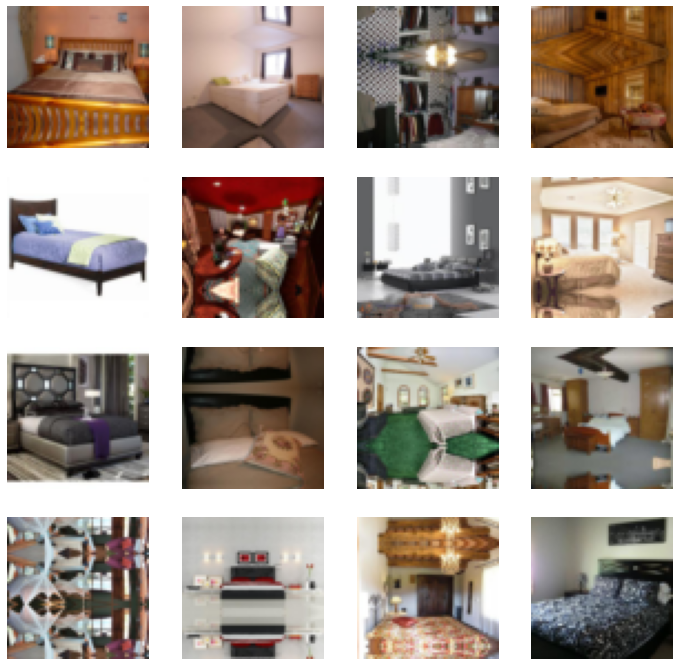

In [7]:
dls.show_batch(max_n=16)

In [8]:
generator = basic_generator(out_size=size, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=size, n_channels=3, n_extra_layers=1)

In [9]:
learn = GANLearner.wgan(dls, generator, critic, opt_func = Adam)

In [10]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [11]:
learn.fit(30, 2e-4, wd=0.)


/anaconda/envs/oneweek-env-py38/lib/python3.8/site-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/anaconda/envs/oneweek-env-py38/lib/python3.8/site-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/anaconda/envs/oneweek-env-py38/lib/python3.8/site-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,gen_loss,crit_loss,time
0,-1.166494,0.714517,-1.499976,12:07
1,-1.163448,0.725352,-1.534878,10:12
2,-1.133113,0.711781,-1.487888,10:12
3,-1.073892,0.686815,-1.402626,10:13
4,-1.117534,0.672359,-1.396587,10:13
5,-0.810195,0.614746,-1.139707,10:13
6,-1.065231,0.546915,-1.228993,10:13
7,-0.580551,0.581761,-1.130787,10:13
8,-0.964116,0.525363,-1.095792,10:12
9,-1.127172,0.524590,-1.129452,10:12


/anaconda/envs/oneweek-env-py38/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


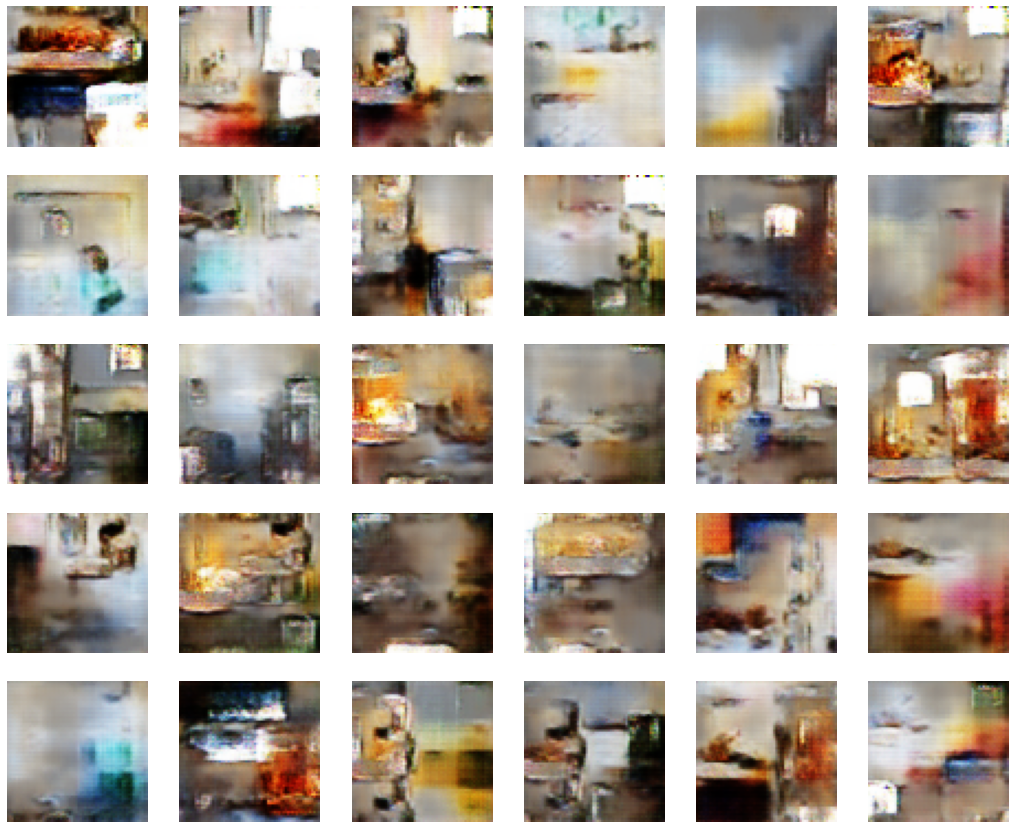

In [12]:
learn.show_results(max_n=30, ds_idx=0)
